## Sobre o DataSet:

O Dataset contem dados da Corrida Rio Antigo que foi organizada pela De Castilho Sports que foi realizada no dia 09/06/2024, foi minha primeira corrida de rua, esperem que goste da minha Análise Exploratória.

Características:

* O dataset é da corrida de 10 km.

* O dataset possui 11 colunas, que são as seguintes.
    1. ***Pos*** que significa a posição geral que a pessoa chegou;
    2. ***Num*** que é referente ao número que fica na camisa da pessoa;
    3. ***Nome*** que é referente ao nome completo da pessoa;
    4. ***Equipe*** que é referente a equipe que o corredor faz parte;
    5. ***Sx*** que é referente ao sexo da pessoa sendo Masculino ou Feminino;
    6. ***Cat*** que signfica em qual categoria a pessoa se encontra;
    7. ***Por categoria*** que significa qual a posição da pessoa na categoria;
    7. ***PC*** que significa o tempo que a pessoa chegou no ponto de controle (a corrida teve apenas 1 ponto de controle);
    8. ***Tempo*** que significa o tempo decorrido da pessoa do momento que que ela passa pela linha de partida e chega na linha de chegada
    9. ***Tempo Bruto*** que significa o tempo decorrida da pessoa do momento que a prova começa até a linha de chegada.
    10. ***Vel. Média*** é a velocidade média do corredor na prova.

Algumas Observações:

* O Tempo Bruto e o Tempo podem ser ligeiramente diferentes de acordo com a posição da saída do atleta, quanto mais longe ele estiver da linha de partida maior será essa diferença.

* Usaremos a Vel. Média como nosso indicador de desempenho, pois como é uma corrida de 10 km, todos os que completaram se deslocaram 10 km de forma identica so modificando o tempo necessário para esse deslocamento.

* Faremos essa EDA utilizando o plotly.express como biblioteca gráfica.


In [2]:
#Importando as bibliotecas Necessárias
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
dados_corrida = pd.read_excel("Dados da Corrida Rio Antigo.xlsx")

In [4]:
#Limpando os dados que vieram sem o Num que é a chave primária dos corredores
dados_corrida.dropna(subset='Num',inplace=True)
dados_corrida.info()

#Fazendo a coluna de sprint final
dados_corrida['Tempo'] = pd.to_datetime(dados_corrida['Tempo'], format='%H:%M:%S.%f',errors='coerce')
dados_corrida['PC'] = pd.to_datetime(dados_corrida['PC'], format='%H:%M:%S.%f',errors='coerce')

dados_corrida['Sprint_Final'] = dados_corrida['Tempo'] - dados_corrida['PC']
dados_corrida.head()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 0 to 972
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pos            973 non-null    object 
 1   Num            973 non-null    float64
 2   Nome           973 non-null    object 
 3   Equipe         961 non-null    object 
 4   Sx             973 non-null    object 
 5   Cat            972 non-null    object 
 6   Por Categoria  957 non-null    float64
 7   PC             957 non-null    object 
 8   Tempo          971 non-null    object 
 9   Tempo Bruto    958 non-null    object 
 10  Vel.Média      958 non-null    float64
dtypes: float64(3), object(8)
memory usage: 91.2+ KB


,Pos,Num,Nome,Equipe,Sx,Cat,Por Categoria,PC,Tempo,Tempo Bruto,Vel.Média,Sprint_Final
0,1.,543.0,COSME ANCELMO,NaN,Masculino,GM,1.0,1900-01-01 00:28:04.650,1900-01-01 00:31:36.430,0:31:39.35,18.99,0 days 00:03:31.780000
1,2.,5.0,Jose Eloy,EloAtle - Petropolis,Masculino,GM,2.0,1900-01-01 00:29:45.880,1900-01-01 00:33:42.890,0:33:44.60,17.80,0 days 00:03:57.010000
2,3.,7.0,Fabio Baltasar Da Silva,EloAtle - Petropolis,Masculino,GM,3.0,1900-01-01 00:30:34.410,1900-01-01 00:34:27.920,0:34:29.59,17.42,0 days 00:03:53.510000
3,4.,286.0,Renato Rodrigues Castro,KPR CADU PERRUCI FARIA,Masculino,GM,4.0,1900-01-01 00:30:42.420,1900-01-01 00:34:28.940,0:34:29.10,17.41,0 days 00:03:46.520000
4,5.,250.0,Marcio Antonio Rodrigues De Souza,Toscano,Masculino,GM,5.0,1900-01-01 00:30:43.410,1900-01-01 00:34:30.670,0:34:34.35,17.39,0 days 00:03:47.260000


In [5]:
numero_de_pessoas_que_nao_concluiram = dados_corrida['Vel.Média'].isnull().sum()
numero_de_pessoas_que_participaram = dados_corrida['Num'].count()
porcentagem_das_pessoas_que_participaram_e_concluiram = (numero_de_pessoas_que_participaram-numero_de_pessoas_que_nao_concluiram)/numero_de_pessoas_que_participaram
print(f"O número de pessoas que não concluiram foi de {numero_de_pessoas_que_nao_concluiram} pessoas.")
print(f"O número de pessoas que participaram foi de {numero_de_pessoas_que_participaram} pessoas.")
print(f"A porcentagem de pessoas que concluíram foi de {porcentagem_das_pessoas_que_participaram_e_concluiram:.2%}")


O número de pessoas que não concluiram foi de 15 pessoas.
O número de pessoas que participaram foi de 973 pessoas.
A porcentagem de pessoas que concluíram foi de 98.46%


## **Distribuição Geral dos Dados**

- **Distribuição de Participantes por Categoria**: Quantos corredores há em cada categoria (por exemplo, faixa etária, gênero)?
- **Distribuição de Participantes por Equipe**: Quantos corredores há em cada equipe?

### Distribuição Geral por Gênero

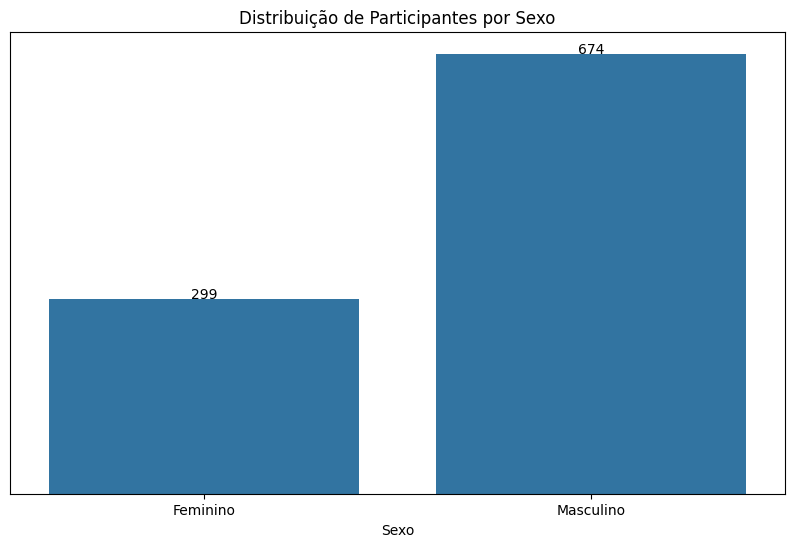

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Primeiro, agrupamos os dados por "Sx" e contamos o número de ocorrências de "Num"
dados_agrupados_por_sx = dados_corrida.groupby("Sx").count()["Num"].reset_index()

# Criamos o gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
grafico = sns.barplot(data=dados_agrupados_por_sx, x="Sx", y="Num")

# Adicionamos os rótulos dos valores acima das barras
for index, row in dados_agrupados_por_sx.iterrows():
    grafico.text(row.name, row.Num, row.Num, color='black', ha="center")

# Adicionamos o título e os rótulos dos eixos
grafico.set_title('Distribuição de Participantes por Sexo')
grafico.set_xlabel('Sexo')
grafico.set_ylabel('')

# Removemos os ticks do eixo y
grafico.yaxis.set_ticks([])

# Exibimos o gráfico
plt.show()


Aproximadamente 30,73% dos participantes da corrida de 10 KM foram mulheres.

### Distribuição Geral por Categoria

In [7]:
# Fazer uma categoria que nao leva em consideração o sexo
# Extraimos essa faixa etária por conta da classificação, portanto, as 5 melhores pessoas no masculino e feminino, nós não conseguimos saber a f
dados_corrida['Categoria_Sem_Sexo'] = dados_corrida['Cat'].str.replace("M","").str.replace("F","")

* Extraimos essa faixa etária por conta da classificação, portanto, as 5 melhores pessoas no masculino e feminino, nós não conseguimos saber a faixa etária , pois suas classificações são 1,2,3,4,5 no Geral Masculino ou Feminino (GM ou GF).

* Por isso quando plotarmos a faixa etária teremos 10 pessoas com valor G, que tiraremos da analise, para não sujar. Essas 10 pessoas são aproximadamente 1% das pessoas que participaram da corrida. 


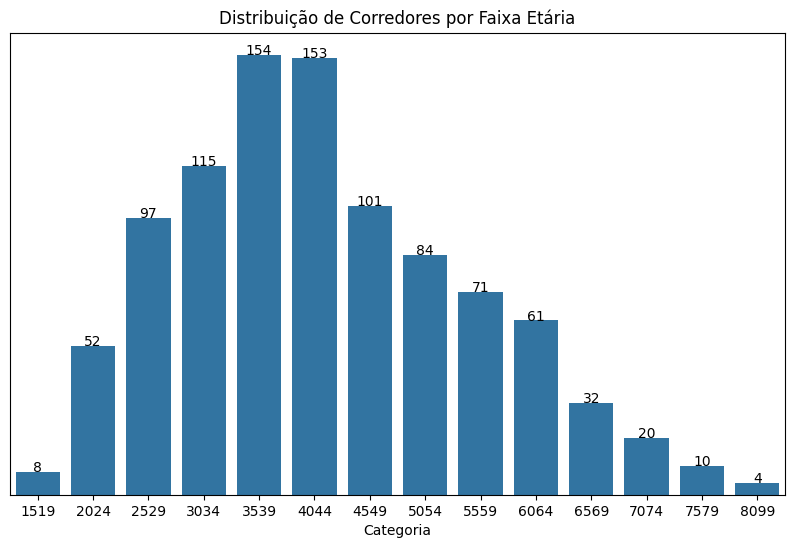

In [8]:
# Primeiro, agrupamos os dados por "Categoria_Sem_Sexo" e contamos o número de ocorrências de "Num"
dados_agrupados_por_categoria = dados_corrida.groupby("Categoria_Sem_Sexo").count()["Num"].reset_index()

# Filtramos os dados para excluir a categoria 'G'
dados_filtrados = dados_agrupados_por_categoria.query("Categoria_Sem_Sexo != 'G'")

# Criamos o gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
grafico = sns.barplot(data=dados_filtrados, x="Categoria_Sem_Sexo", y="Num")

# Adicionamos os rótulos dos valores acima das barras
for index, row in dados_filtrados.iterrows():
    grafico.text(row.name, row.Num, row.Num, color='black', ha="center")

# Adicionamos o título e os rótulos dos eixos
grafico.set_title('Distribuição de Corredores por Faixa Etária')
grafico.set_xlabel('Categoria')
grafico.set_ylabel('')

# Removemos os ticks do eixo y
grafico.yaxis.set_ticks([])

# Exibimos o gráfico
plt.show()

* 31% dos participantes tem entre 35 e 44 anos.
* A moda dos participantes é de 35 a 39 anos.
* Vemos claramente uma distribuição assimétrica a direita, portanto temos mais valores a esquerda do que a direita, formando essa cauda a direita. Temos mais participantes jovens do que velhos.

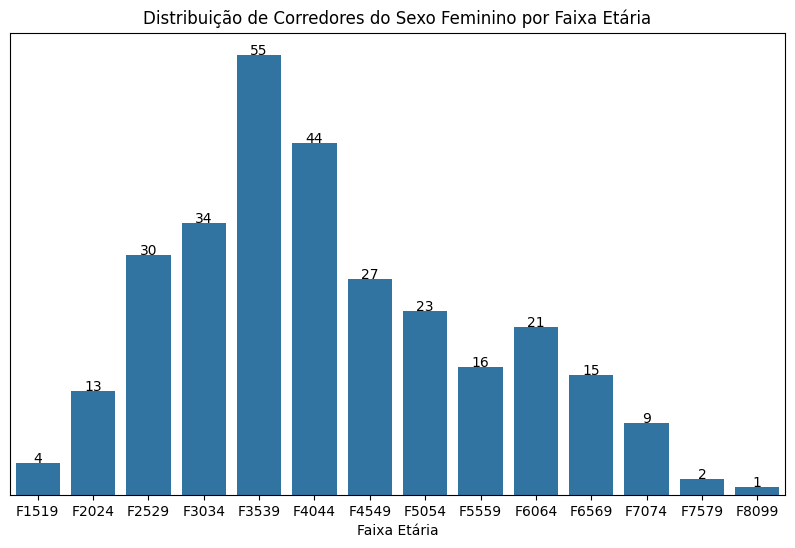

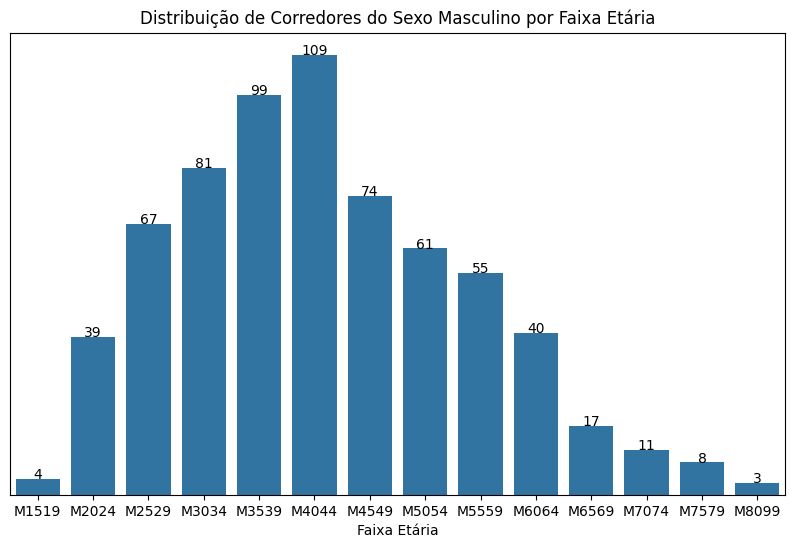

In [9]:
# Filtrando dados por sexo feminino
dados_corrida_mulheres = dados_corrida.query("Sx == 'Feminino'")
dados_agrupados_mulheres_por_categoria = dados_corrida_mulheres.groupby("Cat").count()["Num"].reset_index()

# Removendo a categoria 'GF'
dados_filtrados_mulheres = dados_agrupados_mulheres_por_categoria.query("Cat != 'GF'")

# Criando o gráfico de barras para mulheres
plt.figure(figsize=(10, 6))
grafico_mulheres = sns.barplot(data=dados_filtrados_mulheres, x="Cat", y="Num")

# Adicionando rótulos
for index, row in dados_filtrados_mulheres.iterrows():
    grafico_mulheres.text(row.name, row.Num, row.Num, color='black', ha="center")

# Configurando título e rótulos
grafico_mulheres.set_title('Distribuição de Corredores do Sexo Feminino por Faixa Etária')
grafico_mulheres.set_xlabel('Faixa Etária')
grafico_mulheres.set_ylabel('')

# Removendo ticks do eixo y
grafico_mulheres.yaxis.set_ticks([])

# Exibindo o gráfico
plt.show()

# Filtrando dados por sexo masculino
dados_corrida_homens = dados_corrida.query("Sx == 'Masculino'")
dados_agrupados_homens_por_categoria = dados_corrida_homens.groupby("Cat").count()["Num"].reset_index()

# Removendo a categoria 'GM'
dados_filtrados_homens = dados_agrupados_homens_por_categoria.query("Cat != 'GM'")

# Criando o gráfico de barras para homens
plt.figure(figsize=(10, 6))
grafico_homens = sns.barplot(data=dados_filtrados_homens, x="Cat", y="Num")

# Adicionando rótulos
for index, row in dados_filtrados_homens.iterrows():
    grafico_homens.text(row.name - 1, row.Num, int(row.Num), color='black', ha="center")

# Configurando título e rótulos
grafico_homens.set_title('Distribuição de Corredores do Sexo Masculino por Faixa Etária')
grafico_homens.set_xlabel('Faixa Etária')
grafico_homens.set_ylabel('')

# Removendo ticks do eixo y
grafico_homens.yaxis.set_ticks([])

# Exibindo o gráfico
plt.show()


### Algumas Observações:

* As categorias são para fins de classificação, então, os 5 melhores a gente não consegue atribuir a nenhuma categoria, por isso o nome GM para homens e GF para mulheres.

* Tanto homens como mulheres tem o maior número de participantes entre 35 e 44 anos.

* Mulheres tem Moda ao 3539 e homens tem moda no 4044.

* Tanto homens quanto mulheres tem uma queda acentuada de 4044 para 4549, cabe verificar se nas próximas corridas esse valor irá se manter, pois uma pessoa que faz uma corrida de 10 km de 40 a 44 nao teria motivos aparentes para deixar de correr no 45 e 49.




### Distribuição Geral por Equipe

In [10]:
dados_corrida['Equipe'].value_counts()

Equipe
APPAI                                      477
SECRETARIA DE ESTADO DE ESPORTE E LAZER     16
TALENTOS EM CORRIDA                          8
Nao                                          8
EloAtle - Petropolis                         6
                                          ... 
Correndo pelo corrida                        1
Murillo Esteves                              1
Pimenta                                      1
Moncao                                       1
MUNIZ                                        1
Name: count, Length: 322, dtype: int64

* A maior parte dos atletas são da APPAI, portanto vamos ver a composição de quem é APPAI (Associação Beneficente Professores Públicos Ativos e Inativos) e quem nao é APPAI


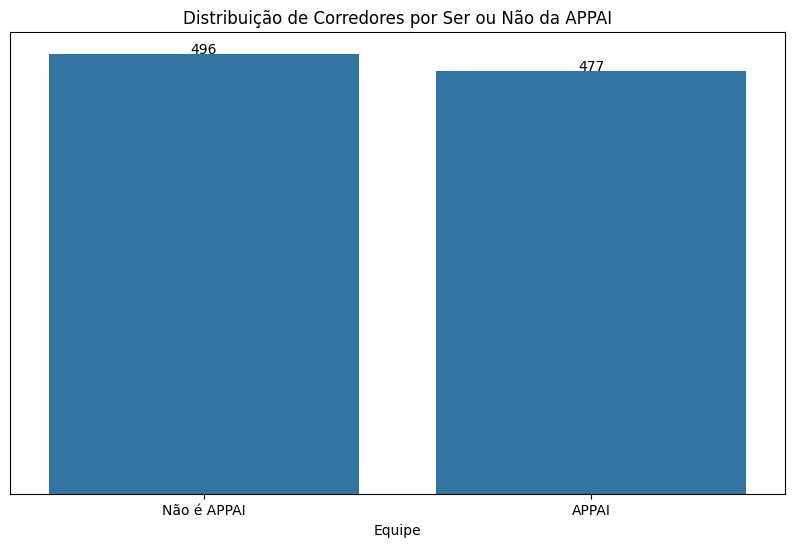

In [11]:
# Adicionando a coluna 'Equipe Appai' ao DataFrame
dados_corrida['Equipe Appai'] = dados_corrida['Equipe'] == 'APPAI'

# Agrupando os dados por 'Equipe Appai' e contando o número de ocorrências de 'Num'
dados_agrupados_por_categoria = dados_corrida.groupby("Equipe Appai").count()["Num"].reset_index()

# Mapeando valores booleanos para rótulos de texto
dados_agrupados_por_categoria['Equipe Appai'] = dados_agrupados_por_categoria['Equipe Appai'].map({True: 'APPAI', False: 'Não é APPAI'})

# Criando o gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
grafico = sns.barplot(data=dados_agrupados_por_categoria, x="Equipe Appai", y="Num")

# Adicionando rótulos dos valores acima das barras
for index, row in dados_agrupados_por_categoria.iterrows():
    grafico.text(index, row.Num, int(row.Num), color='black', ha="center")

# Configurando título e rótulos dos eixos
grafico.set_title('Distribuição de Corredores por Ser ou Não da APPAI')
grafico.set_xlabel('Equipe')
grafico.set_ylabel('')

# Removendo ticks do eixo y
grafico.yaxis.set_ticks([])

# Exibindo o gráfico
plt.show()

* A distribuição APPAI e nao APPAI é dividida quase pela metade, ou seja, demonstra que fazer convenios e incentivar os participantes de associaçôes podem trazer beneficios para eles.
https://www.appai.org.br/lazer/caminhadas-corridas/

* Surge aqui uma sugestão de fazer convênios com mais associações e explorar associações de pessoas mais velhas para compensar a queda natural de pessoas mais velhas na corrida.

## **Desempenho**

* Em geral, qual a distribuição do desempenho na corrida?
* Como é o desempenho em relação ao sexo?
* Como é o desempenho em relação a categorial geral?
* Como é o desempenho em relação a categoria e sexo?
* Como é o desempenho em relação a ser ou não da APPAI?
* Em qual posição eu ficaria nas mulheres?


Obs: Lembrando que usaremos o Pace como medidor de desempenho

### Desempenho na Corrida

In [23]:
# Alterar a Vel.Média que ta em km/h para min/km que é geralmente como vemos o pace.
dados_corrida['Pace_Final'] = 60/dados_corrida['Vel.Média']
dados_corrida.head()
meu_pace = dados_corrida.query("Nome == 'Joao Victor Da Silva Araujo'")['Pace_Final'].iloc[0]

print(f"Meu Pace na Corrida foi de {meu_pace:.2f} minutos por KM")


Meu Pace na Corrida foi de 5.92 minutos por KM


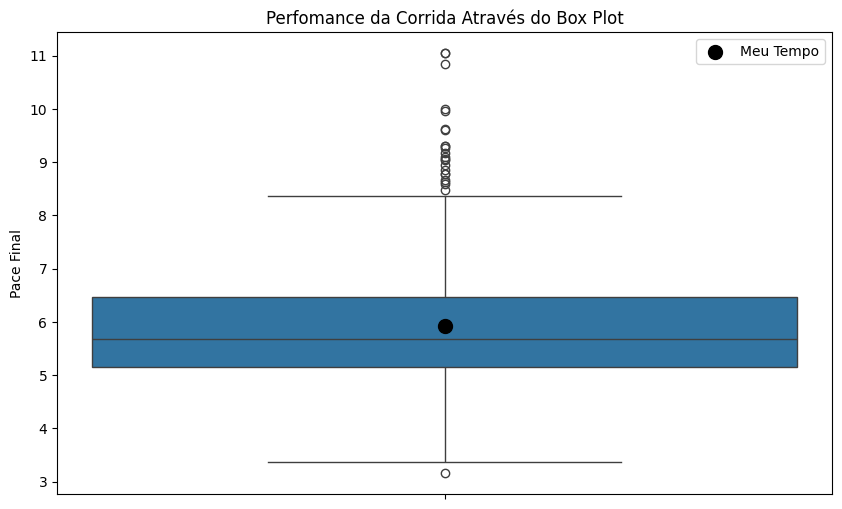

In [24]:
# Filtrando os dados para incluir apenas aqueles que completaram a corrida
dados_corrida_so_quem_completou = dados_corrida.dropna(subset=["Pace_Final"])


# Criando o gráfico de box plot usando Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(y=dados_corrida_so_quem_completou["Pace_Final"])

# Adicionando o ponto de dispersão para "meu_pace"
plt.scatter(x=[0], y=[meu_pace], color='black', s=100, zorder=10, label='Meu Tempo')

# Configurando título e rótulos dos eixos
plt.title('Perfomance da Corrida Através do Box Plot')
plt.xlabel('')
plt.ylabel('Pace Final')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()


* Como podemos ver, eu fiquei proximo da mediana, lembrando que quanto mais baixo o pace, melhor a perfomance. 
* O primeiro colocado foi um outlier e tanto. 3,15 de Pace é um número muito bom, até porque o segundo colocado foi 3,37.
* Tivemos vários candidatos a outlier ruins que são representados pelos pontos acima do bigode superior. 

In [25]:
dados_corrida_so_quem_completou.describe()

,Num,Por Categoria,PC,Tempo,Vel.Média,Sprint_Final,Pace_Final
count,958.000000,957.000000,946,958,958.000000,946,958.000000
mean,5280.797495,30.218391,1900-01-01 00:53:35.749111808,1900-01-01 00:58:35.900146176,10.590021,0 days 00:04:51.116183932,5.858980
min,1.000000,1.000000,1900-01-01 00:28:04.650000,1900-01-01 00:31:36.430000,5.430000,-1 days +23:53:44.970000,3.159558
25%,288.250000,10.000000,1900-01-01 00:45:50.557500160,1900-01-01 00:51:29.364999936,9.280000,0 days 00:04:40.397500,5.150215
50%,821.000000,24.000000,1900-01-01 00:50:49.044999936,1900-01-01 00:56:53.049999872,10.550000,0 days 00:05:41.125000,5.687204
75%,10533.250000,45.000000,1900-01-01 01:04:52.869999872,1900-01-01 01:04:38.627500032,11.650000,0 days 00:06:24.520000,6.465517
max,10918.000000,110.000000,1900-01-01 01:36:45.280000,1900-01-01 01:50:33.340000,18.990000,0 days 00:17:02.570000,11.049724
std,5094.388053,24.862790,NaN,NaN,1.931527,0 days 00:03:12.040572497,1.104452


### Desempenho em Relação ao Sexo

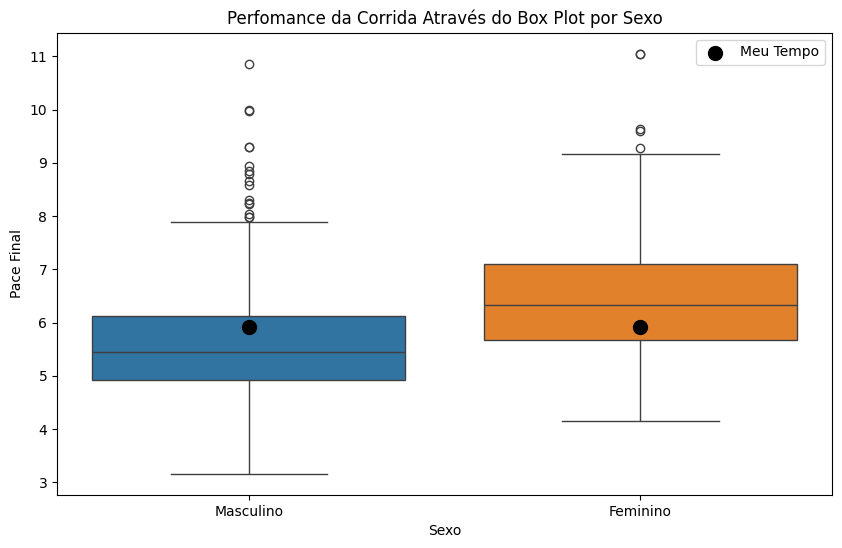

In [26]:
# Filtrando os dados para incluir apenas aqueles que completaram a corrida
dados_corrida_so_quem_completou = dados_corrida.dropna(subset=["Pace_Final"])


# Criando o gráfico de box plot por sexo usando Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_corrida_so_quem_completou, x='Sx', y='Pace_Final', hue='Sx')

# Adicionando os pontos de dispersão para "meu_pace"
plt.scatter(x=['Masculino'], y=[meu_pace], color='black', s=100, zorder=10, label='Meu Tempo')
plt.scatter(x=['Feminino'], y=[meu_pace], color='black', s=100, zorder=10)

# Configurando título e rótulos dos eixos
plt.title('Perfomance da Corrida Através do Box Plot por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Pace Final')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()


* Em geral, os homens tem pace melhor que as mulheres.
* O tamanho do retangulo são bem parecidos o que demonstra que homens e mulheres tem variação próxima dentro do boxplot.
* Separando em Masculino e Feminino, o melhor homem deixa de ser candidato a outlier e ja está dentro do "bigode" do box plot
* Homens tem mais candidatos a outliers (com perfomance pior) que mulheres.
* O q3 dos homens, ou seja, o corte dos 25% piores homens é parecido a mediana das mulheres.
* Para homens, eu fico próximo ao q3, e não próximo a mediana.
* Com o meu tempo, eu seria perto do q1 feminino.

### Desempenho em Relação a Faixa Etária

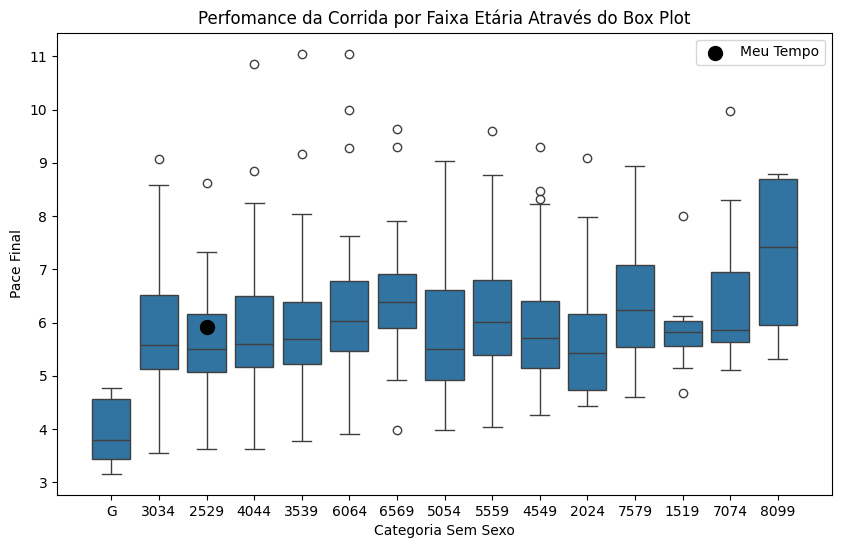

In [27]:



# Criando o gráfico de box plot por categoria sem sexo usando Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_corrida_so_quem_completou, x='Categoria_Sem_Sexo', y='Pace_Final')

# Adicionando o ponto de dispersão para "meu_pace"
plt.scatter(x=['2529'], y=[meu_pace], color='black', s=100, zorder=10, label='Meu Tempo')

# Configurando título e rótulos dos eixos
plt.title('Perfomance da Corrida por Faixa Etária Através do Box Plot')
plt.xlabel('Categoria Sem Sexo')
plt.ylabel('Pace Final')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()


* Um gráfico mais dificil de ler, por conta da quantidade de categorias, e até porque umas categorias tem poucos participantes.
* Para isso, vou criar uma categoria que vai ser com relação a 10 anos, ou seja, vamos fazer de 1524, 2534 e assim pro diante. até 8099
* Para a minha categoria, fiquei bem proximo ao Q3.


In [36]:
# Fazendo as categorias com 10 anos.
def cria_categoria_10_anos(row):
    if row in ['1519','2024']:
        return '15-24'
    elif row in ['2529','3034']:
        return '25-34'
    elif row in ['3539','4044']:
        return '35-44'
    elif row in ['4549','5054']:
        return '45-54'
    elif row in ['5559','6064']:
        return '55-64'
    elif row in ['6569','7074']:
        return '65-74'
    elif row in ['7579','8099']:
        return '75-99'
    else:
        return np.nan
    
dados_corrida_so_quem_completou['Faixa Etária'] = dados_corrida_so_quem_completou['Categoria_Sem_Sexo'].apply(cria_categoria_10_anos)

C:\Users\joaov\AppData\Local\Temp\ipykernel_19112\4055608082.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



* Lembrando que os 5 melhores de cada sexo, não tem faixa etária definida e por isso ficarão com nan.

In [37]:
dados_corrida_so_quem_completou

,Pos,Num,Nome,Equipe,Sx,Cat,Por Categoria,PC,Tempo,Tempo Bruto,Vel.Média,Sprint_Final,Categoria_Sem_Sexo,Equipe Appai,Pace_Final,Faixa Etária
0,1.,543.0,COSME ANCELMO,NaN,Masculino,GM,1.0,1900-01-01 00:28:04.650,1900-01-01 00:31:36.430,0:31:39.35,18.99,0 days 00:03:31.780000,G,False,3.159558,NaN
1,2.,5.0,Jose Eloy,EloAtle - Petropolis,Masculino,GM,2.0,1900-01-01 00:29:45.880,1900-01-01 00:33:42.890,0:33:44.60,17.80,0 days 00:03:57.010000,G,False,3.370787,NaN
2,3.,7.0,Fabio Baltasar Da Silva,EloAtle - Petropolis,Masculino,GM,3.0,1900-01-01 00:30:34.410,1900-01-01 00:34:27.920,0:34:29.59,17.42,0 days 00:03:53.510000,G,False,3.444317,NaN
3,4.,286.0,Renato Rodrigues Castro,KPR CADU PERRUCI FARIA,Masculino,GM,4.0,1900-01-01 00:30:42.420,1900-01-01 00:34:28.940,0:34:29.10,17.41,0 days 00:03:46.520000,G,False,3.446295,NaN
4,5.,250.0,Marcio Antonio Rodrigues De Souza,Toscano,Masculino,GM,5.0,1900-01-01 00:30:43.410,1900-01-01 00:34:30.670,0:34:34.35,17.39,0 days 00:03:47.260000,G,False,3.450259,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,954.,825.0,Silvio Berilho Da Silva,BERILHO,Masculino,M6569,17.0,NaT,1900-01-01 01:33:03.950,1:33:19.67,6.45,NaT,6569,False,9.302326,65-74
954,955.,10820.0,VANDERLEI DE BARROS ROSAS,APPAI,Masculino,M6064,39.0,NaT,1900-01-01 01:40:01.580,1:40:30.95,6.00,NaT,6064,True,10.000000,55-64
955,956.,462.0,Thiago Cezar Da Fonseca Silva,Silva,Masculino,M4044,110.0,1900-01-01 01:33:07.010,1900-01-01 01:48:28.790,1:51:51.44,5.53,0 days 00:15:21.780000,4044,False,10.849910,35-44
956,957.,10565.0,LENITA DE OLIVEIRA,APPAI,Feminino,F6064,19.0,1900-01-01 01:36:44.010,1900-01-01 01:50:31.540,1:55:47.20,5.43,0 days 00:13:47.530000,6064,True,11.049724,55-64


C:\Users\joaov\AppData\Local\Temp\ipykernel_19112\2000805072.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Pace Final')

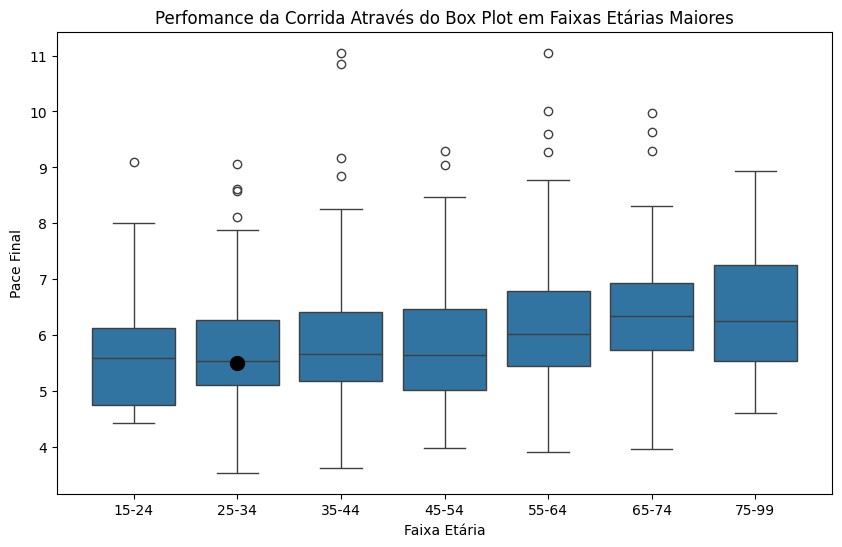

In [38]:


# Definindo a ordem das categorias
ordem_categoria = ['15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-99']
dados_corrida_so_quem_completou['Faixa Etária'] = pd.Categorical(dados_corrida_so_quem_completou['Faixa Etária'], categories=ordem_categoria, ordered=True)

# Criando o gráfico de box plot por faixa etária usando Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_corrida_so_quem_completou, x='Faixa Etária', y='Pace_Final')

# Adicionando o ponto de dispersão para "meu_pace"
plt.scatter(x=['25-34'], y=[meu_pace], color='black', s=100, zorder=10, label='Meu Tempo')

# Configurando título e rótulos dos eixos
plt.title('Perfomance da Corrida Através do Box Plot em Faixas Etárias Maiores')
plt.xlabel('Faixa Etária')
plt.ylabel('Pace Final')

# Adicio


* Nas Faixas Etárias um pouco maiores, fico entre a mediana e o terceiro quartil.
* As dispersões parecem ser próximas devido ao fato do tamanho do retangulo ser bem parecido.
* Não temos nenhum candidato a outlier de alta perfomance, apenas outliers de baixa perfomance.

C:\Users\joaov\AppData\Local\Temp\ipykernel_19112\2916049823.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



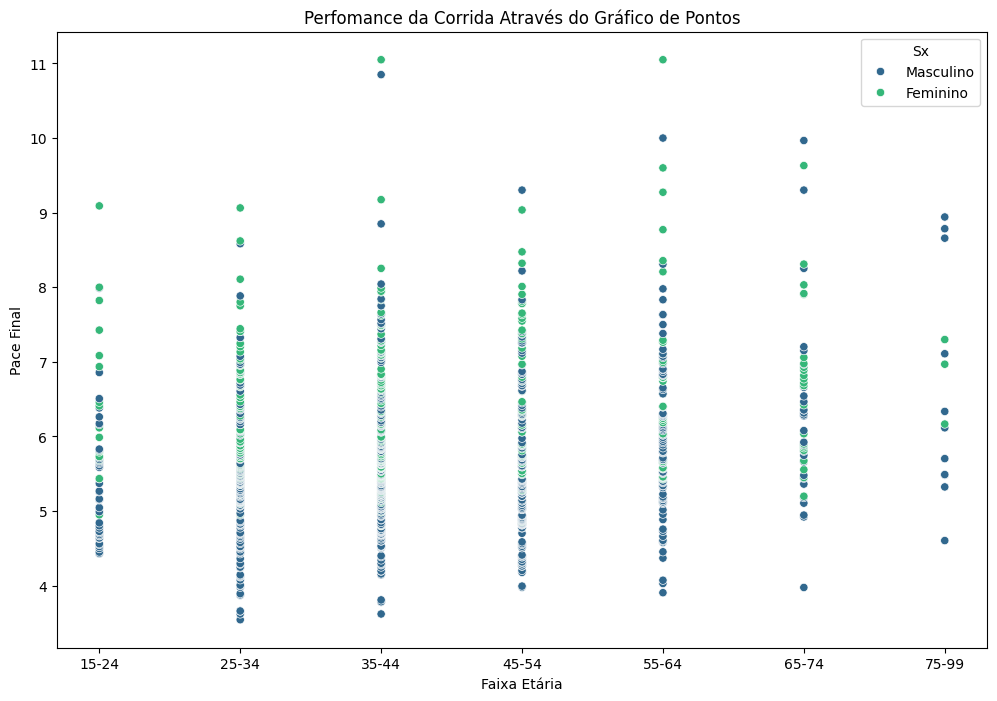

In [39]:
# Definindo a ordem das categorias
ordem_categoria = ['15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-99']
dados_corrida_so_quem_completou['Faixa Etária'] = pd.Categorical(dados_corrida_so_quem_completou['Faixa Etária'], categories=ordem_categoria, ordered=True)

# Criando o gráfico de dispersão usando Seaborn
plt.figure(figsize=(12, 8))
grafico = sns.scatterplot(data=dados_corrida_so_quem_completou, x='Faixa Etária', y='Pace_Final', hue='Sx', palette='viridis')

# Configurando título e rótulos dos eixos
plt.title('Perfomance da Corrida Através do Gráfico de Pontos')
plt.xlabel('Faixa Etária')
plt.ylabel('Pace Final')

# Exibindo o gráfico
plt.show()

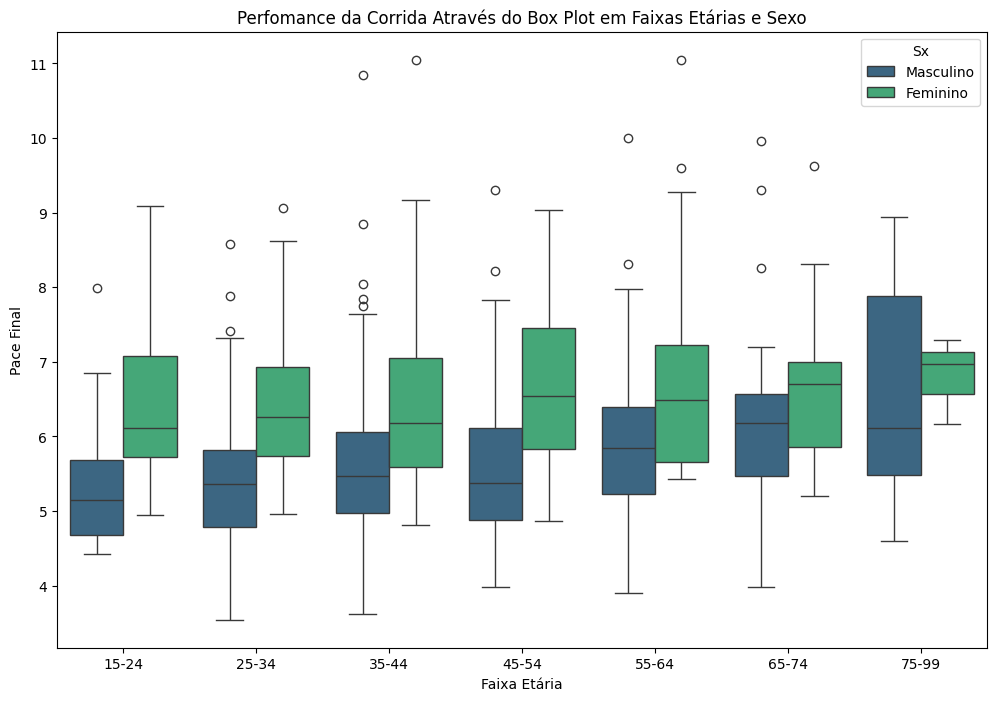

In [40]:
# Criando o gráfico de box plot por faixa etária e sexo usando Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=dados_corrida_so_quem_completou, x='Faixa Etária', y='Pace_Final', hue='Sx', order=ordem_categoria, palette='viridis')

# Configurando título e rótulos dos eixos
plt.title('Perfomance da Corrida Através do Box Plot em Faixas Etárias e Sexo')
plt.xlabel('Faixa Etária')
plt.ylabel('Pace Final')

# Exibindo o gráfico
plt.show()

#### Algumas Observações:
* A categoria de menor mediana geral é a de 25 a 34 anos.
* A categoria com maior desvio padrão parece ser a de 75 a 99, até por apresentar a maior diferença de idades, enquanto as idades são de 10 anos, essa é de 25 anos. Além disso, acredito que existam idosos muito bons com paces muito bons como o Drauzio Varella.
* Como podemos ver, em todas as categorias, homens tem um pace melhor. Ainda mais, tirando de 75 a 99, o 75% dos homens tem perfomance melhor que 50% das mulheres, ou seja, a mulher mediana ficaria no q3 dos homens.
* Para voce ser o melhor em uma categoria, voce precisa ter um pace abaixo de 4 minutos/km
* A disparidade do 65-74 entre o primeiro e segundo é de quase 1 minuto/km, igualmente para o de 75-99.

### Desempenho em relação a ser ou nao da APPAI

In [41]:
dados_corrida_so_quem_completou.head()

,Pos,Num,Nome,Equipe,Sx,Cat,Por Categoria,PC,Tempo,Tempo Bruto,Vel.Média,Sprint_Final,Categoria_Sem_Sexo,Equipe Appai,Pace_Final,Faixa Etária
0,1.,543.0,COSME ANCELMO,NaN,Masculino,GM,1.0,1900-01-01 00:28:04.650,1900-01-01 00:31:36.430,0:31:39.35,18.99,0 days 00:03:31.780000,G,False,3.159558,NaN
1,2.,5.0,Jose Eloy,EloAtle - Petropolis,Masculino,GM,2.0,1900-01-01 00:29:45.880,1900-01-01 00:33:42.890,0:33:44.60,17.80,0 days 00:03:57.010000,G,False,3.370787,NaN
2,3.,7.0,Fabio Baltasar Da Silva,EloAtle - Petropolis,Masculino,GM,3.0,1900-01-01 00:30:34.410,1900-01-01 00:34:27.920,0:34:29.59,17.42,0 days 00:03:53.510000,G,False,3.444317,NaN
3,4.,286.0,Renato Rodrigues Castro,KPR CADU PERRUCI FARIA,Masculino,GM,4.0,1900-01-01 00:30:42.420,1900-01-01 00:34:28.940,0:34:29.10,17.41,0 days 00:03:46.520000,G,False,3.446295,NaN
4,5.,250.0,Marcio Antonio Rodrigues De Souza,Toscano,Masculino,GM,5.0,1900-01-01 00:30:43.410,1900-01-01 00:34:30.670,0:34:34.35,17.39,0 days 00:03:47.260000,G,False,3.450259,NaN


C:\Users\joaov\AppData\Local\Temp\ipykernel_19112\3532623391.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




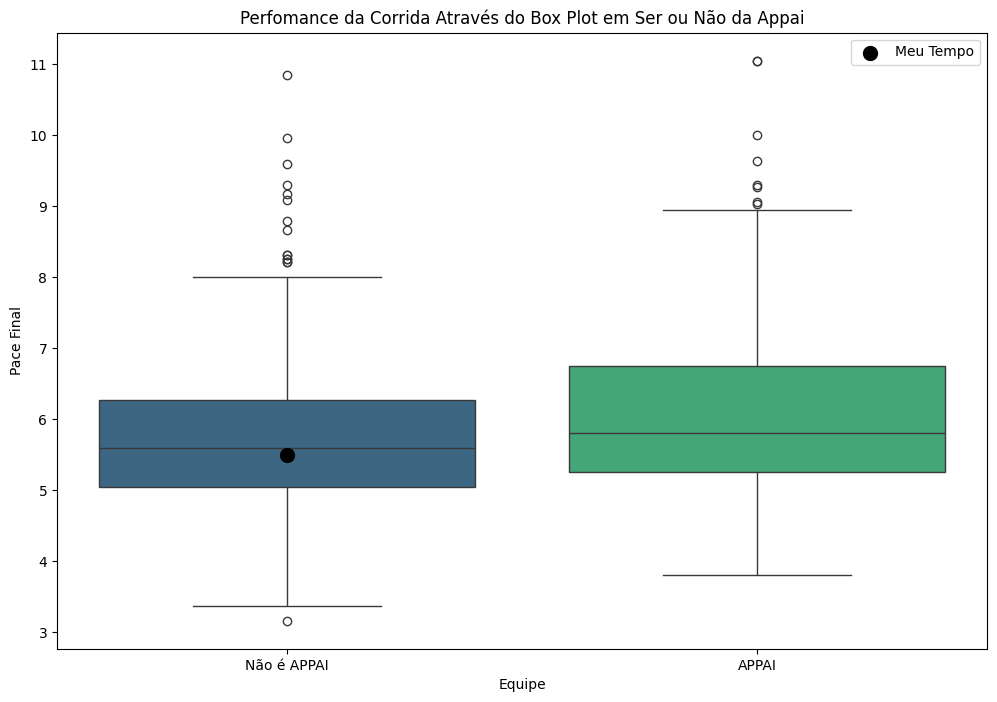

In [43]:

# Criando o gráfico de box plot por ser ou não da Appai usando Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=dados_corrida_so_quem_completou, x='Equipe Appai', y='Pace_Final', palette='viridis')

# Adicionando o ponto de dispersão para "meu_pace"
plt.scatter(x=[False], y=[meu_pace], color='black', s=100, zorder=10, label='Meu Tempo')

# Configurando título e rótulos dos eixos
plt.title('Perfomance da Corrida Através do Box Plot em Ser ou Não da Appai')
plt.xlabel('Equipe')
plt.ylabel('Pace Final')

# Definindo os rótulos do eixo x
plt.xticks(ticks=[0, 1], labels=['Não é APPAI', 'APPAI'])

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()

* Não me parece que ser ou não da APPAI determina o desempenho. O pessoal da APPAI divide em 50% com os que nao são a quantidade de participantes e mesmo assim tem desempenho bem semelhantes.
* Novamente no caso de ser ou não da Appai, eu fiquei entre a Mediana e o Q3.

<Axes: xlabel='Sx', ylabel='proportion'>

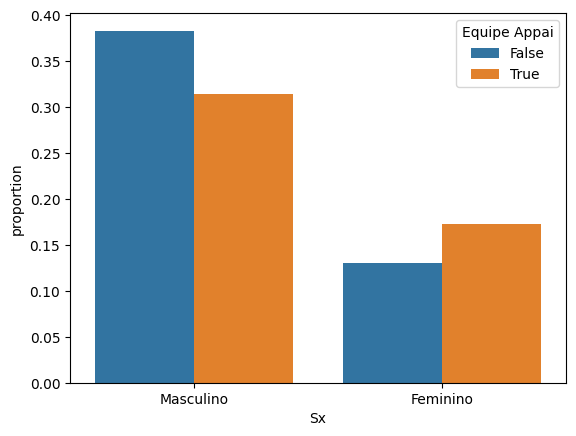

In [51]:
dados_corrida_so_quem_completou[['Equipe Appai','Sx']].value_counts(normalize=True)
sns.barplot(
    dados_corrida_so_quem_completou[['Equipe Appai','Sx']].value_counts(normalize=True).reset_index(),
    x = 'Sx',
    y='proportion',
    hue = 'Equipe Appai'
)

In [46]:
dados_corrida_so_quem_completou[['Equipe Appai','Sx']].value_counts(normalize=True).reset_index()

,Equipe Appai,Sx,proportion
0,False,Masculino,0.383090
1,True,Masculino,0.314196
2,True,Feminino,0.172234
3,False,Feminino,0.130480


* Uma coisa que eu quis notar é, as classes do APPAI são balanceadas em termos de genero? Pois se tivermos mais homens de um lado que o outro isso pode mostrar que o desempenho nao é tão homogeneo, ja que homens por si so tem desempenhos melhores. E mesmo assim o pace APPAI x Nao APPAI ficou parecido.


## Considerações Finais.



### Participação

* A APPAI é uma excelente ferramenta para que grupos profissionais façam parte de corridas e melhorem de vida já que correr está ligado a uma melhora da saúde cardiovascular e vários outros benefícios.

* Para uma análise mais aprofundada de participações é importante fazer análises das corridas de 5 km e a caminhada de 3 km, a corrida de 10 km pode afastar alguns iniciantes.

* A organização da corrida poderia incentivar mais mulheres a participar da corrida de 10km.

### Desempenho

* Como já é esperado, homens tem um pace maior que mulheres, mas isso não é novidade e nem demonstra nem um sinal de fraqueza.

* Importante notar que o melhor desempenho não vem da faixa etária mais jovem e sim da segunda mais jovem para homens e da terceira mais jovem para mulheres, então, para a corrida de 10km, idade é importante, mas experiência parece contar mais.

* A APPAI, além de ter bastante corredores, tem bons corredores, o que demonstra que essas pessoas da APPAI fazer algumas corridas além da do Rio Antigo.

* Quanto ao meu desempenho, fiquei feliz, 1 semana antes da corrida conclui o meu primeiro treino de 10 km e agora fiz um sub 6 numa corrida de 10 km. Que venham os próximos e como demonstra os dados, com experiência me tornarei melhor.